<h1>Статистический анализ данных<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Определение-перспективного-тарифа-для-оператора-сотовой-связи" data-toc-modified-id="Определение-перспективного-тарифа-для-оператора-сотовой-связи-0">Определение перспективного тарифа для оператора сотовой связи</a></span><ul class="toc-item"><li><span><a href="#Первичное-изучение-данных" data-toc-modified-id="Первичное-изучение-данных-0.1">Первичное изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-0.2">Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Звонки" data-toc-modified-id="Звонки-0.2.1">Звонки</a></span></li><li><span><a href="#Сообщения" data-toc-modified-id="Сообщения-0.2.2">Сообщения</a></span></li><li><span><a href="#Интернет-трафик" data-toc-modified-id="Интернет-трафик-0.2.3">Интернет-трафик</a></span></li></ul></li><li><span><a href="#Расчеты-агрегированных-данных" data-toc-modified-id="Расчеты-агрегированных-данных-0.3">Расчеты агрегированных данных</a></span></li><li><span><a href="#Объединение-данных" data-toc-modified-id="Объединение-данных-0.4">Объединение данных</a></span></li><li><span><a href="#Расчет-выручки" data-toc-modified-id="Расчет-выручки-0.5">Расчет выручки</a></span></li><li><span><a href="#Статистический-анализ-данных" data-toc-modified-id="Статистический-анализ-данных-0.6">Статистический анализ данных</a></span></li><li><span><a href="#Гипотезы" data-toc-modified-id="Гипотезы-0.7">Гипотезы</a></span><ul class="toc-item"><li><span><a href="#Средняя-выручка-пользователей-тарифов-Ультра-и-Смарт-различаются" data-toc-modified-id="Средняя-выручка-пользователей-тарифов-Ультра-и-Смарт-различаются-0.7.1">Средняя выручка пользователей тарифов Ультра и Смарт различаются</a></span></li><li><span><a href="#Cредняя-выручка-пользователей-из-Москвы-равна-средней-выручке-пользователей-из-других-регионов" data-toc-modified-id="Cредняя-выручка-пользователей-из-Москвы-равна-средней-выручке-пользователей-из-других-регионов-0.7.2">Cредняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов</a></span></li></ul></li></ul></li><li><span><a href="#Итоговый-вывод" data-toc-modified-id="Итоговый-вывод-1">Итоговый вывод</a></span></li></ul></div>

# Определение перспективного тарифа для оператора сотовой связи


Вы аналитик федерального оператора сотовой связи. 
Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.


Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. 

В вашем распоряжении данные 500 пользователей: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Тариф «Смарт»


Ежемесячная плата: 550 рублей
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 3 рубля
сообщение: 3 рубля
1 Гб интернет-трафика: 200 рублей


Тариф «Ультра»


Ежемесячная плата: 1950 рублей
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
Стоимость услуг сверх тарифного пакета:
минута разговора: 1 рубль
сообщение: 1 рубль
1 Гб интернет-трафика: 150 рублей

## Первичное изучение данных

Загружаем датасеты и изучаем общую информацию

In [2]:
#загружаем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import math

In [3]:
#загружаем файлы
try:
    data_calls = pd.read_csv('/datasets/calls.csv')
    data_internet = pd.read_csv('/datasets/internet.csv')
    data_message = pd.read_csv('/datasets/messages.csv')
    data_tariffs = pd.read_csv('/datasets/tariffs.csv')
    data_users = pd.read_csv('/datasets/users.csv')
except:
    data_calls = pd.read_csv('/datasets/calls.csv')
    data_internet = pd.read_csv('/datasets/internet.csv')
    data_message = pd.read_csv('/datasets/messages.csv')
    data_tariffs = pd.read_csv('/datasets/tariffs.csv')
    data_users = pd.read_csv('/datasets/users.csv')
    


FileNotFoundError: [Errno 2] No such file or directory: '/datasets/calls.csv'

In [3]:
#для первичного изучения информации напишем функцию, в параметры которой будем вставлять датасеты

def first_look(data):
    display(data.head())
    print(data.info())
    count=0
    for element in data.columns:
        if data[element].isna().sum() > 0:
            print(element, data[element].isna().sum(), 'пропусков')
            count=+1
        if count==0:
            print('Пропусков нет')
                
    if data.duplicated().sum() > 0:
        print('Дубликатов: ', data.duplicated().sum())
    else:
        print ('Дубликатов нет')
        

In [4]:
first_look(data_calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None
Пропусков нет
Пропусков нет
Пропусков нет
Пропусков нет
Дубликатов нет


In [5]:
first_look(data_internet)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None
Пропусков нет
Пропусков нет
Пропусков нет
Пропусков нет
Пропусков нет
Дубликатов нет


In [6]:
first_look(data_message)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None
Пропусков нет
Пропусков нет
Пропусков нет
Дубликатов нет


In [7]:
first_look(data_tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes
None
Пропусков нет
Пропусков нет
Пропусков нет
Пропусков нет
Пропусков нет
Пропусков нет
Пропусков нет
Пропусков нет
Дубликатов нет


In [8]:
first_look(data_users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None
Пропусков нет
Пропусков нет
churn_date 462 пропусков
Дубликатов нет


<div class="alert alert-info">
<b>ВЫВОД:</b>
<br>По результатам изучения датасетов можно сделать следующие промежуточные выводы:
    
    
   1.В данных датасетах отсутствуют пропуски и дубликаты, что упрощает нам предобработку данных.
    
    
   2.Даты во всех датасетах имеют тип данных object, необходимо будет привести их к типу datetime64. 
    
    
   3.В описании тарифов трафик измеряется в гигабайтах, а в датасетах приводится другая размерность -мегабайт, необходимо будет привести мегабайты к гигабайтам.</div>


## Предобработка данных

Приведите данные к нужным типам;
Найдите и исправьте ошибки в данных, если они есть.
Поясните, какие ошибки вы нашли и как их исправили. В данных вы найдёте звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять.
Посчитайте для каждого пользователя:
количество сделанных звонков и израсходованных минут разговора по месяцам;
количество отправленных сообщений по месяцам;
объем израсходованного интернет-трафика по месяцам;
помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).


### Звонки

In [9]:
#работаем с таблицей data_calls
#перевод даты из объектного типа в тип datetime64

data_calls['call_date'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

#добавляем столбец с категорией месяца (нумерация 1-12)
data_calls['month_num'] = pd.DatetimeIndex(data_calls['call_date']).month

#добавляем столбец с началом календарного месяца
data_calls['month']=data_calls['call_date'].astype('datetime64[M]')

#округляем длительность звонков и меняем тип данных на целочисленный

data_calls['duration'] = np.ceil(data_calls['duration']).astype('int')

data_calls.head()


,id,call_date,duration,user_id,month_num,month
0,1000_0,2018-07-25,0,1000,7,2018-07-01
1,1000_1,2018-08-17,0,1000,8,2018-08-01
2,1000_2,2018-06-11,3,1000,6,2018-06-01
3,1000_3,2018-09-21,14,1000,9,2018-09-01
4,1000_4,2018-12-15,6,1000,12,2018-12-01


Посмотрим распределение длительности звонков с помощью гистограммы

(array([4.8015e+04, 9.1940e+03, 1.0362e+04, 2.2329e+04, 1.1457e+04,
        1.1510e+04, 1.1272e+04, 2.1159e+04, 9.3850e+03, 8.4480e+03,
        7.4860e+03, 1.2059e+04, 4.5510e+03, 3.6710e+03, 2.9840e+03,
        4.2170e+03, 1.3040e+03, 9.7500e+02, 1.1880e+03, 3.6300e+02,
        2.5700e+02, 1.5100e+02, 1.6000e+02, 3.9000e+01, 3.0000e+01,
        1.7000e+01, 1.3000e+01, 5.0000e+00, 2.0000e+00, 4.0000e+00]),
 array([ 0.        ,  1.26666667,  2.53333333,  3.8       ,  5.06666667,
         6.33333333,  7.6       ,  8.86666667, 10.13333333, 11.4       ,
        12.66666667, 13.93333333, 15.2       , 16.46666667, 17.73333333,
        19.        , 20.26666667, 21.53333333, 22.8       , 24.06666667,
        25.33333333, 26.6       , 27.86666667, 29.13333333, 30.4       ,
        31.66666667, 32.93333333, 34.2       , 35.46666667, 36.73333333,
        38.        ]),
 <BarContainer object of 30 artists>)

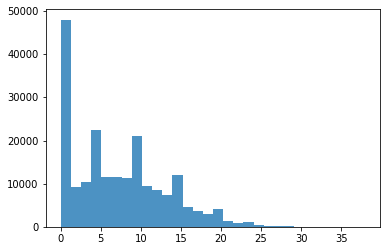

In [10]:
plt.hist(data_calls['duration'], bins=30, alpha=0.8);

### Сообщения

In [11]:
#Работаем с таблицей data_message
#перевод даты из объектного типа в тип datetime64

data_message['message_date'] = pd.to_datetime(data_message['message_date'], format='%Y-%m-%d')

#добавляем столбец с категорией месяца (нумерация 1-12)
data_message['month_num'] = pd.DatetimeIndex(data_message['message_date']).month

#добавляем столбец с началом календарного месяца
data_message['month']=data_message['message_date'].astype('datetime64[M]')

data_message.head()


,id,message_date,user_id,month_num,month
0,1000_0,2018-06-27,1000,6,2018-06-01
1,1000_1,2018-10-08,1000,10,2018-10-01
2,1000_2,2018-08-04,1000,8,2018-08-01
3,1000_3,2018-06-16,1000,6,2018-06-01
4,1000_4,2018-12-05,1000,12,2018-12-01


### Интернет-трафик

In [13]:
#Работаем с таблицей data_internet
display(data_internet.head())
#перевод даты из объектного типа в тип datetime64

data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')

#добавляем столбец с категорией месяца (нумерация 1-12)
data_internet['month_num'] = pd.DatetimeIndex(data_internet['session_date']).month

#добавляем столбец с началом календарного месяца
data_internet['month']=data_internet['session_date'].astype('datetime64[M]')

#переводим использованный трафик с МБ на ГБ, название столбца пока оставим 
#data_internet['mb_used'] = (data_internet['mb_used']/1024+0.5).astype('int')

data_internet.head()


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,Unnamed: 0,id,mb_used,session_date,user_id,month_num,month
0,0,1000_0,112.95,2018-11-25,1000,11,2018-11-01
1,1,1000_1,1052.81,2018-09-07,1000,9,2018-09-01
2,2,1000_2,1197.26,2018-06-25,1000,6,2018-06-01
3,3,1000_3,550.27,2018-08-22,1000,8,2018-08-01
4,4,1000_4,302.56,2018-09-24,1000,9,2018-09-01


In [15]:
#добавим столбец tariff для последующего объединения таблиц

data_tariffs = data_tariffs.rename(columns = {'tariff_name' : 'tariff'})
data_tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<div class="alert alert-info">
<b>ВЫВОД:</b>
<br>В этом разделе мы делали преобразование данных во всех датасетах (звонки, сообщения, траффик) и подготовили данные к дальнейшим расчетам.
    


## Расчеты агрегированных данных

In [16]:
calls = data_calls.groupby(['user_id','month']).agg(
    calls_duration = pd.NamedAgg(column = 'duration', aggfunc ='sum'),
    calls_number = ('id', 'count'),
).reset_index()
calls.head(10)

,user_id,month,calls_duration,calls_number
0,1000,2018-05-01,159,22
1,1000,2018-06-01,172,43
2,1000,2018-07-01,340,47
3,1000,2018-08-01,408,52
4,1000,2018-09-01,466,58
5,1000,2018-10-01,350,57
6,1000,2018-11-01,338,43
7,1000,2018-12-01,333,46
8,1001,2018-11-01,430,59
9,1001,2018-12-01,414,63


In [17]:
messages = data_message.groupby(['user_id','month']).agg(
    msgs_number = pd.NamedAgg(column = 'id', aggfunc ='count'),
    ).reset_index()
messages.head(10)

,user_id,month,msgs_number
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
5,1000,2018-10-01,73
6,1000,2018-11-01,58
7,1000,2018-12-01,70
8,1002,2018-06-01,4
9,1002,2018-07-01,11


In [18]:
traffic = data_internet.groupby(['user_id','month']).agg(
    traffic = pd.NamedAgg(column = 'mb_used', aggfunc ='sum'),
    ).reset_index()
traffic.head(10)

,user_id,month,traffic
0,1000,2018-05-01,2253.49
1,1000,2018-06-01,23233.77
2,1000,2018-07-01,14003.64
3,1000,2018-08-01,14055.93
4,1000,2018-09-01,14568.91
5,1000,2018-10-01,14702.49
6,1000,2018-11-01,14756.47
7,1000,2018-12-01,9817.61
8,1001,2018-11-01,18429.34
9,1001,2018-12-01,14036.66


<div class="alert alert-info">
<b>ВЫВОД:</b>
<br>В этом разделе мы сделали расчет агрегированных данных по пользователям, их будем использовать для формирования сводной таблицы для расчетов.

## Объединение данных



In [19]:
data = calls.merge(
messages, how = 'outer', on=['user_id','month'] )

data =data.merge(
traffic, how = 'outer', on=['user_id','month'] )

data =data.merge(
data_users, how = 'outer', on=['user_id'] )

#data =data.merge(data_users, how = 'outer', on=['user_id'] )

data = data.rename(columns = {'tariff_y' : 'tariff'})

data =data.merge(
data_tariffs, how = 'outer', on=['tariff'] )


display(data)

,user_id,month,calls_duration,calls_number,msgs_number,traffic,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,2018-05-01,159.0,22.0,22.0,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,2018-06-01,172.0,43.0,60.0,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,2018-07-01,340.0,47.0,75.0,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,2018-08-01,408.0,52.0,81.0,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,2018-09-01,466.0,58.0,57.0,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,2018-09-01,NaN,NaN,32.0,17206.30,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,2018-10-01,NaN,NaN,21.0,19559.44,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3213,1489,2018-11-01,NaN,NaN,20.0,17491.56,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3214,1489,2018-12-01,NaN,NaN,35.0,17322.51,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


In [20]:
# В сводной таблице много значений Nan. пропущенные значения заменяем на нули в столбцах, которые будем использовать для расчетов

data.loc[data['calls_duration'].isna(), 'calls_duration'] = 0
data.loc[data['msgs_number'].isna(), 'msgs_number'] = 0
data.loc[data['traffic'].isna(), 'traffic'] = 0

display(data)

,user_id,month,calls_duration,calls_number,msgs_number,traffic,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,2018-05-01,159.0,22.0,22.0,2253.49,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,2018-06-01,172.0,43.0,60.0,23233.77,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,2018-07-01,340.0,47.0,75.0,14003.64,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,2018-08-01,408.0,52.0,81.0,14055.93,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,2018-09-01,466.0,58.0,57.0,14568.91,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,2018-09-01,0.0,NaN,32.0,17206.30,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,2018-10-01,0.0,NaN,21.0,19559.44,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3213,1489,2018-11-01,0.0,NaN,20.0,17491.56,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3214,1489,2018-12-01,0.0,NaN,35.0,17322.51,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3


<div class="alert alert-info">
<b>ВЫВОД:</b>
<br>В этом разделе мы сделали объединенную табличку со всеми нужными для расчета данными. Значения Nan для значимых для расчета столбцов заменяем на нули.

##  Расчет выручки


In [21]:
#заведем функцию для расчета выручки по клиентам

def calculate(row):
    fare = row.rub_monthly_fee
    if (row.msgs_number > row.messages_included):
        fare += (row.msgs_number - row.messages_included)*row.rub_per_message
    if (row.calls_duration > row.minutes_included):
        fare += (row.calls_duration - row.minutes_included)*row.rub_per_minute
    if (row.traffic > row.mb_per_month_included):
        fare += math.ceil((row.traffic - row.mb_per_month_included)/1024)*row.rub_per_gb
    return round(fare,2)

In [22]:
data['revenue'] = data.apply(calculate, axis=1)

display(data)

,user_id,month,calls_duration,calls_number,msgs_number,traffic,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,2018-05-01,159.0,22.0,22.0,2253.49,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,2018-06-01,172.0,43.0,60.0,23233.77,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,2018-07-01,340.0,47.0,75.0,14003.64,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,2018-08-01,408.0,52.0,81.0,14055.93,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,2018-09-01,466.0,58.0,57.0,14568.91,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,2018-09-01,0.0,NaN,32.0,17206.30,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,950.0
3212,1489,2018-10-01,0.0,NaN,21.0,19559.44,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,1550.0
3213,1489,2018-11-01,0.0,NaN,20.0,17491.56,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,1150.0
3214,1489,2018-12-01,0.0,NaN,35.0,17322.51,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,950.0


<div class="alert alert-info">
<b>ВЫВОД:</b>
<br>В этом разделе мы написали функцию для расчета выручки на основе использованных пользователем услуг -звонков, сообщений, интернет-трафика и рассчитали выручку по каждому пользователю.

## Статистический анализ данных

Посчитаем для каждого пользователя, сколько ему необходимо минут, сообщений и интернет трафика в месяц. Для этого используем таблицу data. Найдем медиану, дисперсию и стандартное отклонение. 

In [28]:
display(data)

,user_id,month,calls_duration,calls_number,msgs_number,traffic,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue
0,1000,2018-05-01,159.0,22.0,22.0,2253.49,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
1,1000,2018-06-01,172.0,43.0,60.0,23233.77,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
2,1000,2018-07-01,340.0,47.0,75.0,14003.64,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
3,1000,2018-08-01,408.0,52.0,81.0,14055.93,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
4,1000,2018-09-01,466.0,58.0,57.0,14568.91,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,2018-09-01,0.0,NaN,32.0,17206.30,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,950.0
3212,1489,2018-10-01,0.0,NaN,21.0,19559.44,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,1550.0
3213,1489,2018-11-01,0.0,NaN,20.0,17491.56,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,1150.0
3214,1489,2018-12-01,0.0,NaN,35.0,17322.51,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,950.0


In [29]:
desc_stat = data.pivot_table(index=['tariff'], values=['calls_duration', 'msgs_number', 'traffic'], 
                    aggfunc={'calls_duration': [np.median, np.var, np.std], 
                             'msgs_number': [np.median, np.var, np.std], 
                             'traffic': [np.median, np.var, np.std]})
desc_stat

calls_duration                            msgs_number             \
               median         std            var      median        std   
tariff                                                                    
smart           421.5  190.476754   36281.393836        28.0  28.230396   
ultra           518.0  317.887549  101052.493549        38.0  47.806040   

                       traffic                              
                var     median           std           var  
tariff                                                      
smart    796.955256  16505.475   5879.187315  3.456484e+07  
ultra   2285.417425  19304.020  10101.095459  1.020321e+08

Для визуального анализа построим гистограммы.

<AxesSubplot:>

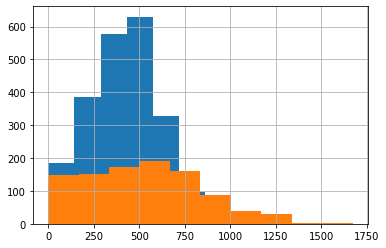

In [30]:
data_smart = data.query('tariff == "smart"')
data_ultra = data.query('tariff == "ultra"')

data_smart['calls_duration'].hist()
data_ultra['calls_duration'].hist()

<AxesSubplot:>

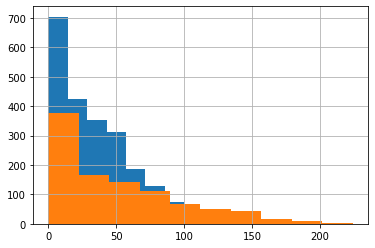

In [31]:
data_smart['msgs_number'].hist()
data_ultra['msgs_number'].hist()

<AxesSubplot:>

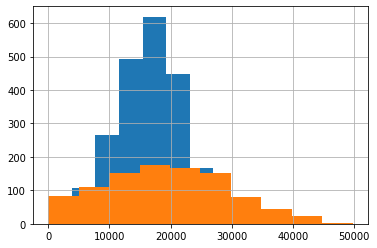

In [32]:
data_smart['traffic'].hist()
data_ultra['traffic'].hist()

<div class="alert alert-info">
<b>ВЫВОД:</b>
<br>
    Как видно из графиков и рассчитанных данных, длительность звонков, количество сообщений и интернет трафик по тарифу "Ультра" имеет большую дисперсию по сравнению с тарифом «Смарт», и медианы по вышеперечисленным признакам также смещены в большую сторону. Пользователи тарифа "Ультра" всегда укладываются в лимиты звонков и смс, но небольшая часть не укаладывается в лимит интернет трафика.
    В рамках тарифа "Смарт" можно наблюдать выбросы, это пользователи, которые не укладываются в лимиты тарифа.
    
    
  

## Гипотезы


### Средняя выручка пользователей тарифов Ультра и Смарт различаются

H0 - Средняя выручка пользователей тарифов Ультра и Смарт, то есть средние значения равны

H1 -  Средняя выручка пользователей тарифов Ультра и Смарт, то есть средние значения не равны


Дисперсии выборок были рассчитаны выше, они отличаются больше чем на 5%.

In [33]:
ultra = data.query('tariff == "ultra"')['revenue']
smart = data.query('tariff == "smart"')['revenue']
print(ultra)
alpha = .05

results = st.ttest_ind(
    ultra, 
    smart, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0      1950.0
1      1950.0
2      1950.0
3      1950.0
4      1950.0
        ...  
981    1950.0
982    1950.0
983    1950.0
984    1950.0
985    1950.0
Name: revenue, Length: 986, dtype: float64
p-значение: 1.927011394420941e-250
Отвергаем нулевую гипотезу


<div class="alert alert-info">
<b>ВЫВОД:</b>
<br>p-значение достаточно мало, что дает основание отвергнуть предположение об отсутствии различий между выручками у разных тарифных планов, то есть маловероятна случайность результатов теста гипотезы.
    

In [34]:
data.pivot_table(index='tariff', values='revenue', aggfunc='median')

,revenue
tariff,
smart,1021.0
ultra,1950.0


<AxesSubplot:xlabel='tariff', ylabel='revenue'>

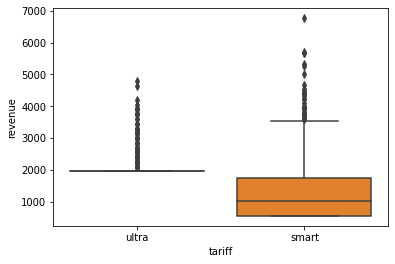

In [35]:
sns.boxplot(x="tariff", y='revenue',data=data)

<div class="alert alert-info">
<b>ВЫВОД:</b>
<br> Средние значения выручки по тарифам различаются почти в 3 раза. Если у пользователя подключен тариф "Смарт" с абонентской платой в 550 рублей, то он скорее всего по итогам месяца заплатит гораздо больше из-за нехватки услуг в рамках тарифного пакета, это видно из графика.

В заключение можно подтвердить, что доходы "Мегалайна" с пользователя по тарифу "Ультра" действительно отличаются по сравнению с доходами от тарифа "Смарт".

### Cредняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов
H0  — средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

H1 — средняя выручка пользователей из Москвы отличается от средней выручке пользователей из других регионов.

α=1%

In [36]:
moscow = data.query('city == "Москва"')['revenue']
regions = data.query('city != "Москва"')['revenue']

alpha = .05

results = st.ttest_ind(
    moscow, 
    regions, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.5216952110000278
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-info">
<b>ВЫВОД:</b>
<br>T-тест не дал возможности опровергунть исходную гипотезу о том, средняя выручка пользователей из Москвы равна средней выручке пользователей из других регионов.

# Итоговый вывод

<div class="alert alert-info">
<b></b>
<br>По результатам проведенной работы можно сделать вывод, что доходы от тарифа «Ультра» больше, чем от тарифа «Смарт»: в среднем «Мегалайн» от одного пользователя в месяц получает 1950 рублей и 616 рублей соответственно.

Особенности использования тарифов заключаются в следующем:

Некоторым пользователям тарифа «Смарт» не хватает услуг в рамках тарифного пакета - и они вынуждены брать дополнительные пакеты звонков, сообщений и интернет трафика. 
    
  А пользователи тарифа «Ультра», напротив, не используют тарифный пакет в полном объеме.
   
   
  С точки зрения бизнеса, на мой взгляд, интерес представляют пользователи тарифа "Смарт", которые не укладываются в лимиты представленных в рамках тарифа услуг. Им можно предложить перейти на более премиальный тариф "Смарт", что будет гораздо комфортнее. 